In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


In [5]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

X_train=X_train.reshape(-1,28,28,1).astype("float32")/255.0
X_test=X_test.reshape(-1,28,28,1).astype("float32")/255.0

y_train_cat=to_categorical(y_train,10)
y_test_cat=to_categorical(y_test,10)


In [6]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))


E:\ML Projects\New folder\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit(
    X_train,y_train_cat,
    validation_split=0.1,
    epochs=10,
    batch_size=64,
    verbose=2
) 

Epoch 1/10
844/844 - 48s - 57ms/step - accuracy: 0.9460 - loss: 0.1783 - val_accuracy: 0.9845 - val_loss: 0.0547
Epoch 2/10
844/844 - 80s - 95ms/step - accuracy: 0.9840 - loss: 0.0515 - val_accuracy: 0.9885 - val_loss: 0.0401
Epoch 3/10
844/844 - 43s - 50ms/step - accuracy: 0.9885 - loss: 0.0352 - val_accuracy: 0.9918 - val_loss: 0.0322
Epoch 4/10
844/844 - 41s - 49ms/step - accuracy: 0.9914 - loss: 0.0268 - val_accuracy: 0.9880 - val_loss: 0.0436
Epoch 5/10
844/844 - 80s - 95ms/step - accuracy: 0.9934 - loss: 0.0195 - val_accuracy: 0.9893 - val_loss: 0.0408
Epoch 6/10
844/844 - 39s - 46ms/step - accuracy: 0.9952 - loss: 0.0146 - val_accuracy: 0.9887 - val_loss: 0.0483
Epoch 7/10
844/844 - 39s - 47ms/step - accuracy: 0.9957 - loss: 0.0122 - val_accuracy: 0.9900 - val_loss: 0.0384
Epoch 8/10
844/844 - 40s - 48ms/step - accuracy: 0.9968 - loss: 0.0101 - val_accuracy: 0.9910 - val_loss: 0.0408
Epoch 9/10
844/844 - 44s - 52ms/step - accuracy: 0.9972 - loss: 0.0085 - val_accuracy: 0.9905 - 

In [9]:
test_loss,test_acc=model.evaluate(X_test,y_test_cat)
print(f"\nTest Accuracy:{test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9910 - loss: 0.0321

Test Accuracy:0.9910


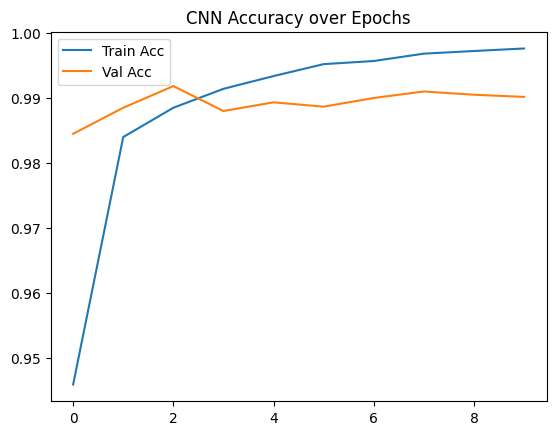

In [10]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('CNN Accuracy over Epochs')
plt.legend()
plt.show()
